# Introduction to Neural Network classification with TensorFlow

A classification problem is where you try to classify something as one thing or another.   
We have:
* Binary Classification: we have two labels (e.g. spam or not spam)
* Multiclass Classification: we have more than two labels (eg. dog, human, flower)
* Multilabel Classification: we need to associate many labels to a predication (eg. associate tags to a given text)


In [1]:
from sklearn.datasets import make_circles
from tensorflow.keras.datasets import fashion_mnist

import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sb

import itertools
import random

%matplotlib inline

In [2]:
import tensorflow as tf
tf.__version__

'2.10.0'

## Creating binary dataset to work on

In [3]:
n_samples = 1000
X,y = make_circles(n_samples,noise=.03,random_state=42)

In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
y[:9]

array([1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
X[0]

array([0.75424625, 0.23148074])

In [8]:
y[0]

1

Let's visualize the data

In [9]:
circle_df = pd.DataFrame({
    "X0":X[:,0],
    "X1":X[:,1],
    "label":y
})
circle_df.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


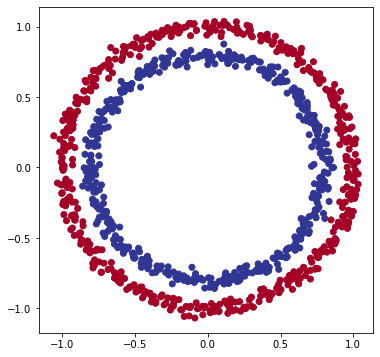

In [10]:
plt.figure(figsize=[6,6])

plt.scatter(data=circle_df, x="X0",y="X1",c="label", cmap=plt.cm.RdYlBu);

The model we want to build will tell wether a given point is red or blue

🛠️ **Exercise**: Spend some 20 minutes playing around with [https://playground.tensorflow.org](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.14726&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) building and running different neural networks. See what happens when you change different hyperparameters.

## Steps in creating a classification model
Those steps are:
1. Create or import a model
1. Compile the model
1. Fit the model
1. Evaluate the model
1. Tweak the model
1. Evaluate the model
1. An iteration of the previous two steps

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Creating a model using the Sequential API
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), #.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X,y, epochs=5, verbose=1)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 2.5945 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7420 - accuracy: 0.4990
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7073 - accuracy: 0.4910
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4890


The accuracy is 0.4960, 49.6%. This means that on average, out of 100 examples, the model only gets 50 examples right. This in turn mean that the model is basically guessing.

Let's try and improve the model by training for longer.

In [12]:
# Let's train for 200 more epochs (for a total of 205 epochs)
history = model_1.fit(X,y, epochs=200, verbose=1)

Epoch 1/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5090
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4920
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.4710
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4590
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5090
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4970
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4770
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4800
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4810
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4930
Epoch 84/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4960
Epoch 85/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4930
Epoch 86/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4880
Epoch 87/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4720
Epoch 88/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4470
Epoch 89/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4720
Epoch 90/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4820
Epoch 91/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4860
Epoch 92/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5050
Epoch 93/200


32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4610
Epoch 165/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4970
Epoch 166/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4800
Epoch 167/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.4930
Epoch 168/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4690
Epoch 169/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4880
Epoch 170/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4850
Epoch 171/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4980
Epoch 172/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4770
Epoch 173/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4730
Epoc

The accuracy here is 0.4810, 48%. The model performance did not improved that much.

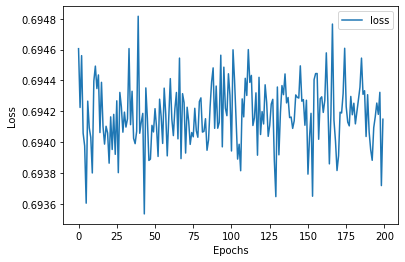

In [13]:
# Plot history
history_df = pd.DataFrame(history.history)
history_df.plot(kind="line",y="loss")
plt.ylabel("Loss")
plt.xlabel("Epochs");

And looking at the plot, our model is performing really poorly and seems unable to converge.

Let's try to improve the model by setting an extra layer.

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# 3. Fit the model
history_2 = model_2.fit(X,y,epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 2.2086 - accuracy: 0.5050
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.5070
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.4680
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5170
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.4720
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.4720
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4800
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.4890
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4880
Epoch 86/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5040
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.4770
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.4540
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.4770
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4990
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.4960
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5040
Epoch 93/100


The accuracy of model_2 is about the same as model_1 even with an extra layer.

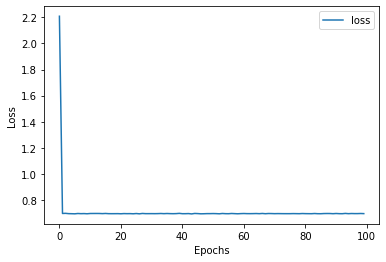

In [15]:
# Plot history
history_df2 = pd.DataFrame(history_2.history)
history_df2.plot(kind="line",y="loss")
plt.ylabel("Loss")
plt.xlabel("Epochs");

We can also see from the above plot that the model is no more improving after its first epoch.

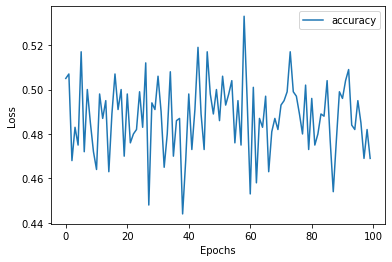

In [16]:
history_df2.plot(kind="line",y="accuracy")
plt.ylabel("Loss")
plt.xlabel("Epochs");

## Improving a model

In [17]:
# Set random seed
tf.random.set_seed(42)

# 1. Creating a model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Improving the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 3. Fit the model
history_3 = model_3.fit(X,y,epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 3.6838 - accuracy: 0.4530
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.3821 - accuracy: 0.4760
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7287 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7065 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.4780
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.4640
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4440
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.4530
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5050
Epoch 85/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6960 - accuracy: 0.4380
Epoch 86/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.5000
Epoch 87/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6968 - accuracy: 0.4450
Epoch 88/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6972 - accuracy: 0.4590
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.4650
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.4730
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.4930
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.4790
Epoch 93/100


The accuracy, 0.4970 (49.7%), is still about the same as that of the old models.

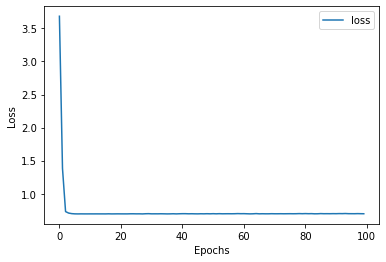

In [18]:
# Plot history
history_df3 = pd.DataFrame(history_3.history)
history_df3.plot(kind="line",y="loss")
plt.ylabel("Loss")
plt.xlabel("Epochs");

Looking at the loss evolution over the epochs, the model is not learning anything from the data after its first epoch.

Recalling our ML practioner motto: `visualize, visualize, visualize`. It is good idea to visualize the following as much as possible (specially whenever the model is not performing as wanted):
* the data: to know what is look like
* the model: to know its layers and its differents components
* the training: observing the loss in a plot
* the predictions

We will visualize our model predictions against the label. 

In [19]:
def plot_decision_boundary(model, X, y)->None:
    """
        Plots the decision boundary craeted by a model predicting on X
    
        Params:
            - trained model
            - features (X)
            - label (y)
            
        Do:
            - Create a meshgrid of the different X values
            - Make predictions acorss the meshgrid
            - Plot the prediction as well as a line between the different zones (where each unique class falls)
            
            
        numpy meshgrid: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
        
        Inspired by:
            - https://cs231n.github.io/neural-networks-case-study/
    """
    
    # Define the axis boundaries of the plot and create a meshgrid
    x_min = X[:,0].min() - .1  # -0.1 was done to give oursleves a little bit of margin in the future plot
    x_max = X[:,0].max() + .1
    y_min = X[:,1].min() - .1
    y_max = X[:,1].max() + .1
    
    # Create the meshgrid
    xx, yy = np.meshgrid( np.linspace(x_min,x_max,100),
                          np.linspace(y_min,y_max,100))
    
    # Create new X values (predictions will be make on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class or binary-class classification
    if len(y_pred[0])>1:
        print("Doing multi-class classification")
        # Reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Doing binary classification


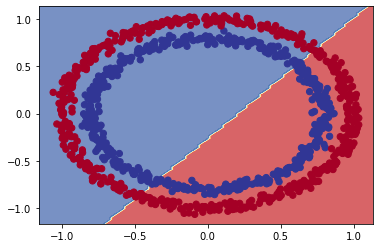

In [20]:
# Check out the predictons our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

The above plot explains why the model is performing poorly: it looks like it's trying to draw straight line as a decision boundary to separate the data (the white line separating the red zone of the rectangle from the blue zone of the rectangle).      

The issue here is that we have got a circular data (the red and blue points for two circles), so they are not separable by a straight line. If we were working on a regression problem, our current model might actually work, but for our current problem the model is inappropriate.

## Non-linearity in a model

Let's try to use a model based on a linear activation function to make predictions.

In [21]:
# Set seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=.001),
               metrics=["accuracy"])

# 3. Fit the model
history_4 = model_4.fit(X,y,epochs=100,verbose=1)

Epoch 1/100


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 1s 3ms/step - loss: 6.3184 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3086 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3031 - accuracy: 0.4880
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3029 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3025 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3022 - accuracy: 0.4880
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3019 - accuracy: 0.4880
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3016 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3014 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3010 - accuracy: 0.4880
Epoch 11/100
32/32 [=

32/32 [==============================] - 0s 3ms/step - loss: 6.1928 - accuracy: 0.4880
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1927 - accuracy: 0.4880
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1925 - accuracy: 0.4880
Epoch 86/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1923 - accuracy: 0.4880
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1921 - accuracy: 0.4890
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1919 - accuracy: 0.4890
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1918 - accuracy: 0.4890
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1916 - accuracy: 0.4890
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1914 - accuracy: 0.4890
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1912 - accuracy: 0.4890
Epoch 93/100


The accuracy is 0.4740 (47.4%), the model is still performing poorly.

Let's remind ourselves of what our data looks like, because whenever our model predictions are not working very well, we can evaluate our model by looking at the evaluation metrics or we can adhere to our ML practionner motto: visualize.

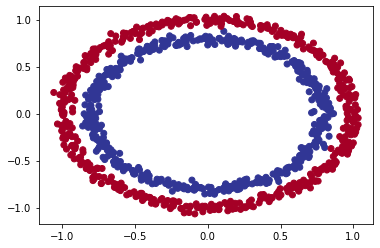

In [22]:
# Reminding ourselve of what our data looks like
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
Doing binary classification


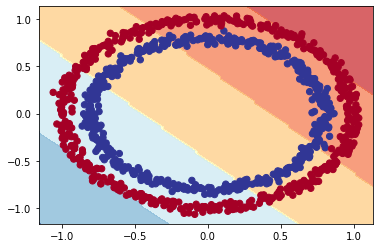

In [23]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,X=X, y=y)

* Everything in the yellow zone could be blue or red point (which is why the model is performing so poorly)
* Everything in the red zone is classified as red point
* Everything in the blue zone is classified as blue point

Let's try to build a neural network with a non-linear activation function.

In [24]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=.001),
               metrics=["accuracy"])

# 3. Fit the model
history_5 = model_5.fit(X,y,epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2949 - accuracy: 0.4630
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2736 - accuracy: 0.4640
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2451 - accuracy: 0.4670
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2259 - accuracy: 0.4660
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1955 - accuracy: 0.4650
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1388 - accuracy: 0.4650
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0939 - accuracy: 0.4690
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0353 - accuracy: 0.4700
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9618 - accuracy: 0.4690
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9174 - accuracy: 0.4720
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.9282 - accuracy: 0.4850
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9238 - accuracy: 0.4860
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9196 - accuracy: 0.4850
Epoch 86/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9157 - accuracy: 0.4850
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9119 - accuracy: 0.4850
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9084 - accuracy: 0.4860
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9050 - accuracy: 0.4850
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9018 - accuracy: 0.4850
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8985 - accuracy: 0.4860
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8955 - accuracy: 0.4870
Epoch 93/100


The accuracy is 0.4720 (47.2%). The model is still performing poorly.

We are going to build a more complex model, with a non-line

In [25]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=["accuracy"])

# 3. Fit the model
history_6= model_6.fit(X,y,epochs=200, verbose=1)

Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 2.4726 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 2.2660 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 2.2084 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 2.1091 - accuracy: 0.4980
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 1.9008 - accuracy: 0.4850
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 1.7559 - accuracy: 0.4630
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 1.7147 - accuracy: 0.4050
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 1.5949 - accuracy: 0.3440
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 1.0352 - accuracy: 0.3020
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.8868 - accuracy: 0.2910
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.2918 - accuracy: 0.9620
Epoch 84/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2843 - accuracy: 0.9570
Epoch 85/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2775 - accuracy: 0.9620
Epoch 86/200
32/32 [==============================] - 0s 4ms/step - loss: 0.2712 - accuracy: 0.9610
Epoch 87/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2636 - accuracy: 0.9600
Epoch 88/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2571 - accuracy: 0.9610
Epoch 89/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2506 - accuracy: 0.9680
Epoch 90/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2450 - accuracy: 0.9600
Epoch 91/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2384 - accuracy: 0.9660
Epoch 92/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2317 - accuracy: 0.9700
Epoch 93/200


32/32 [==============================] - 0s 3ms/step - loss: 0.0862 - accuracy: 0.9840
Epoch 165/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0861 - accuracy: 0.9790
Epoch 166/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0852 - accuracy: 0.9840
Epoch 167/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0840 - accuracy: 0.9860
Epoch 168/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0848 - accuracy: 0.9850
Epoch 169/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0827 - accuracy: 0.9830
Epoch 170/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0837 - accuracy: 0.9850
Epoch 171/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0816 - accuracy: 0.9880
Epoch 172/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0806 - accuracy: 0.9850
Epoch 173/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0798 - accuracy: 0.9850
Epoc

The accuracy is 0.9620 (96%). This means that out of 100 predictions, 96 are made right.

313/313 [==============================] - 1s 2ms/step
Doing binary classification


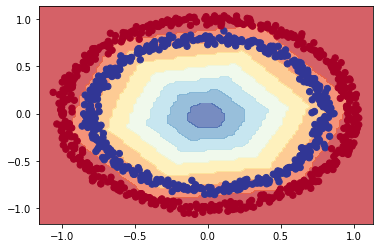

In [26]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_6,X=X, y=y)

Looking at the plot, the model has a nearly perfect decision boundary (which explain the high accuracy), but it's in doubt about the position blue and right zones (we can see that by the fact there are hue in the zones). Let's try to resolve that by putting an activation function on the last layer.

In [27]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # we are using sigmoid activation on the last layer because it is a binary classification problem
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=.001),
               metrics=["accuracy"])

# 3. Fit the model
history_7= model_7.fit(X,y,epochs=200, verbose=1)

Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 0.7028 - accuracy: 0.5010
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.4870
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.4880
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.4840
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.4800
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4760
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4690
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4650
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.4660
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.4670
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.5200 - accuracy: 0.8120
Epoch 84/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5135 - accuracy: 0.8360
Epoch 85/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5074 - accuracy: 0.8190
Epoch 86/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5022 - accuracy: 0.8450
Epoch 87/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4948 - accuracy: 0.8470
Epoch 88/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4890 - accuracy: 0.8680
Epoch 89/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.8700
Epoch 90/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4763 - accuracy: 0.9060
Epoch 91/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4702 - accuracy: 0.9280
Epoch 92/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4635 - accuracy: 0.9340
Epoch 93/200


32/32 [==============================] - 0s 3ms/step - loss: 0.1279 - accuracy: 0.9990
Epoch 165/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1263 - accuracy: 0.9990
Epoch 166/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1244 - accuracy: 0.9990
Epoch 167/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1226 - accuracy: 0.9990
Epoch 168/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1208 - accuracy: 0.9990
Epoch 169/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1190 - accuracy: 0.9990
Epoch 170/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1177 - accuracy: 0.9990
Epoch 171/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1157 - accuracy: 0.9990
Epoch 172/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1141 - accuracy: 0.9990
Epoch 173/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1125 - accuracy: 0.9990
Epoc

The accuracy for our last model is 0.9980 (99.8%). This means that out 100 predictions, all of them are made right. This model is a good one.

Let's visualize what how our model is performing on the data.

313/313 [==============================] - 1s 2ms/step
Doing binary classification


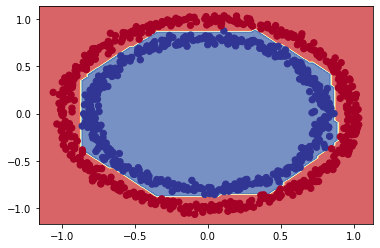

In [28]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_7,X=X, y=y)

The model has an excellent decision boundary, which explain why it is performing so well on the data.

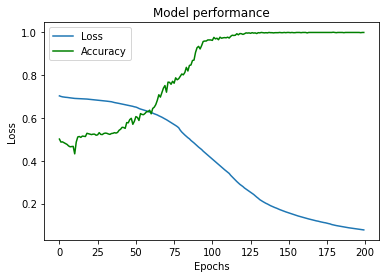

In [29]:
# Plot history
history_df7 = pd.DataFrame(history_7.history)

sb.lineplot(data=history_df7, y="loss", x=range(0,200),  label="Loss" )
sb.lineplot(data=history_df7, y="accuracy", x=range(0,200), color="green", label="Accuracy" )

plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(loc="upper left")

plt.title("Model performance");

## Understanding how activation functions work

The combination of linear (straight lines) and non-linear (non-straight lines) is one of the key fundamental of how a neural networks work.
An activation function somewhat tells the neural network if a given layer should draw a straight or a non-straight line, and how it should draw it.

Read [https://www.v7labs.com/blog/neural-networks-activation-functions](https://www.v7labs.com/blog/neural-networks-activation-functions) for further details.

Let's see how activation functions work.

In [30]:
# Create a toy tensor (similar to the data we pass to our models)
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

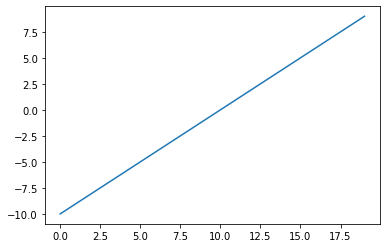

In [31]:
# Visualize the toy tensor
plt.plot(A);

Our tensor is a straight line. Let's try to apply a sigmoid function on it to see what it will become.

In [32]:
# Define a sigmoid function: sigmoid(x) = 1 / ( 1 + exp(-x) )
def sigmoid(x):
    return 1 / (1 + tf.exp(-x) )

# Test the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

Now let us see what our data looks like after the sigmoid function is applied to it. Recall that the data was originally a straight line.

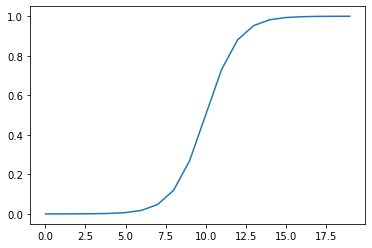

In [33]:
plt.plot(sigmoid(A));

The data on which a sigmoid function is applied is now a non-straight line. That is what an activation function does: it introduce non-linearity in a model.

According to [https://www.v7labs.com/blog/neural-networks-activation-functions](https://www.v7labs.com/blog/neural-networks-activation-functions):

*Activation functions introduce an additional step at each layer during the forward propagation, but its computation is worth it. Here is why—  <br/>
Let’s suppose we have a neural network working without the activation functions.<br/>
In that case, every neuron will only be performing a linear transformation on the inputs using the weights and biases. It’s because it doesn’t matter how many hidden layers we attach in the neural network; all layers will behave in the same way because the composition of two linear functions is a linear function itself. <br/>
Although the neural network becomes simpler, learning any complex task is impossible, and our model would be just a linear regression model.*

The same article talks about activation functions, and which type of straight or non-straight each line each one draws. 

In [34]:
# Let's try to replicate relu function: relu(x)= max(0,X)
def relu(x):
    return tf.maximum(0,x)

# Test relu function on our tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

Now let us see what our data looks like after the relu function is applied to it. Recall that the data is originally a straight line.

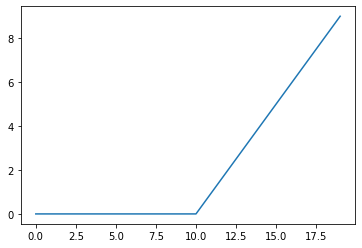

In [35]:
plt.plot(relu(A));

In conclusion, an activation function gives its layer the ability to draw a straight or a non-straight line. In the case of a non-straight line, the specific line is define by the activation function.

📖 : [https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html)

## Leveraging the learning rate to improve the model convergence time

From here, we will create a training and a test set.

In [36]:
len(X)

1000

In [37]:
# Split manually into train and test sets
X_train, y_train = X[:800,:], y[:800]
X_test, y_test= X[800:,:], y[800:]
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [38]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=.01), # We set the learning rate to 0.01 (it was 0.001). The learning rate tell by how much the model should update its weights and bias
               metrics=["accuracy"])

# 3. Fit the model
history_8 = model_8.fit(X_train, y_train, epochs=50, verbose=1) # We decrease the epochs to 50

Epoch 1/50


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


25/25 [==============================] - 1s 3ms/step - loss: 0.7200 - accuracy: 0.4762
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.4450
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.4387
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4837
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4762
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4888
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4963
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5013
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5013
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4812
Epoch 11/50
25/25 [===========

Because we increase the learning rate, the model learned faster.

In [39]:
# 4. Evaluate the model
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5050


[0.693105161190033, 0.5049999952316284]

On the test set (data that the model has never seen before), we got an accuracy of 96.5% (over a 100 predictions, 96 were made right)

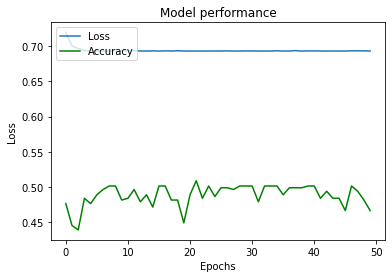

In [40]:
# Plot history
history_df8 = pd.DataFrame(history_8.history)

sb.lineplot(data=history_df8, y="loss", x=range(0,50),  label="Loss" )
sb.lineplot(data=history_df8, y="accuracy", x=range(0,50), color="green", label="Accuracy" )

plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(loc="upper left")

plt.title("Model performance");

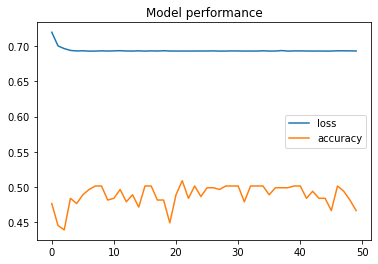

In [41]:
# Another way to make the above plot
history_df8.plot()

plt.title("Model performance");

313/313 [==============================] - 1s 2ms/step
Doing binary classification


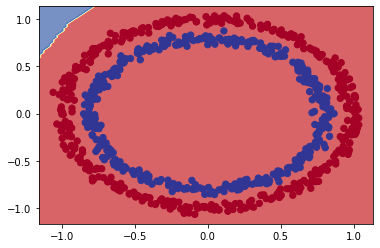

In [42]:
# Plot decision boundary for training set
plot_decision_boundary(model=model_8,X=X_train, y=y_train)

313/313 [==============================] - 1s 2ms/step
Doing binary classification


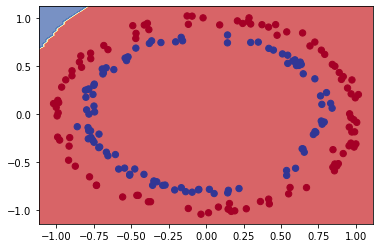

In [43]:
# Plot decision boundary for test set
plot_decision_boundary(model=model_8,X=X_test, y=y_test)

📕 The main takeaway is all we did was took `model_7`, increased its learning rate by 10 times (from 0.001 to 0.01), and the model converged faster.

## Find a model ideal learning rate

In order to find our model ideal learning rate, we are going to have to visualize our loss decreasing and potentially decrease our learning rate during training.     
The plot in the next cell let's visualizing the loss deacreasing.

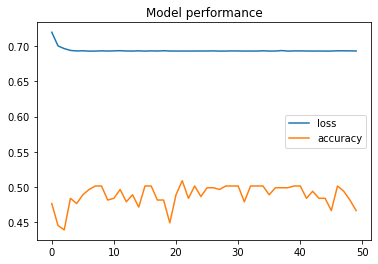

In [44]:
# Observing a model performance in training
history_df8.plot()

plt.title("Model performance");

Now the objective is to update the learning rate during training.

To find the ideal learning rate (the learning rate where the loss decreases the most during training), we are going to use the following steps:
* A **learning rate callback**: it an extra-piece of functionality that can be added to a model while it's training.
* A **modified loss curves plot**: it is similar to the loss curve plotted previously, but we are going to have to modify it because we are going to set up a learning rate callback to start at a certain value of a learning rate and gradually decrease or increase that learning rate during training; and then, we will make another plot of "the loss versus the learning rate" to find out the learning rate value at which the loss decreases the most.

In [45]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

# 2a. Compile the model
model_9.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(lr=.01),
               metrics=["accuracy"])

# 2b. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20) )

# The above plot is essentially saying to offer the learning rate scheduler every epcoh to traverse a set of
# learning rate values, starting from 1e-4 and increasing by 10**(epoch/20) every epoch.


# 3. Fit the model
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler], verbose=1)

Epoch 1/100


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


25/25 [==============================] - 1s 3ms/step - loss: 0.6953 - accuracy: 0.5075 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5050 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5063 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5063 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5075 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5050 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6947 - ac

Epoch 73/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1605 - accuracy: 0.9388 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8163 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4788 - accuracy: 0.8087 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7257 - accuracy: 0.5925 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.7325 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6714 - accuracy: 0.6550 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7537 - accuracy: 0.5300 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6745 - accuracy: 0.5350 - lr: 0.8913
Epoch 81/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7226 - accuracy: 0.5

Our training appears to have gone as usual, except that this time we can notice in the output the learning rate at each epoch is different from the others.

In [46]:
# Looking at the content of the model training history
history_df9 = pd.DataFrame(history_9.history)
history_df9.head()

,loss,accuracy,lr
0,0.695332,0.50750,0.000100
1,0.695263,0.50500,0.000112
2,0.695185,0.50625,0.000126
3,0.695118,0.50625,0.000141
4,0.695032,0.50750,0.000158


Let us notice in that we also have a new column in the history dataframe: the learning rate (lr).

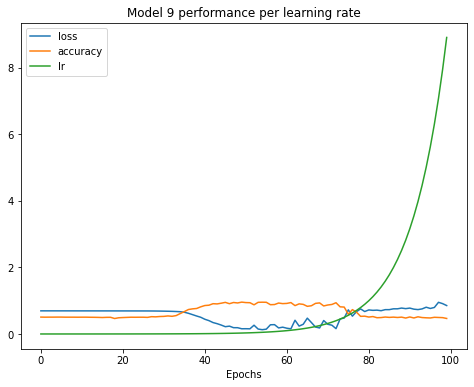

In [47]:
# Model 9 performance
history_df9.plot(figsize=(8,6))

plt.xlabel("Epochs")
plt.title("Model 9 performance per learning rate");

The above plot looks a little bit different to the loss curves created before.     
The accuracy started around 0.5, seems to go up slightly (around 1), then goes down.    
The loss started a little higher than 0.5, then goes down fairly significantly, before increasing again.    

Recall what we want: the learning rate where our loss decreases the fastest. This seems to be between 40-45. We have few ways to find an exact value:
* redo the plot while zoom-in in the x-axis, and maybe defining custom xticks values.
* plot the learning rate versus the loss

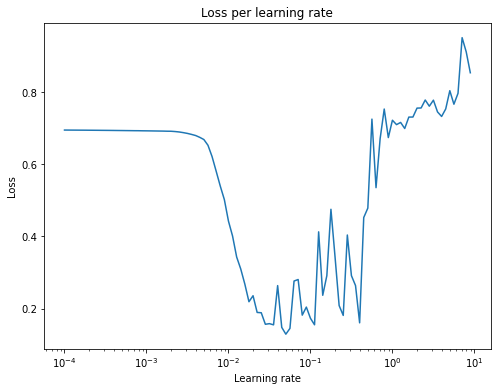

In [48]:
# Plot the learning rate versus the loss

n_epochs=100 # number of epochs we train

# Relicating the formula that was passed to the learning rate scheduler
lrs = 1e-4 * 10**( tf.range(n_epochs)/20 ) # This gives us the learning rate for each epoch
# lrs

plt.figure(figsize=[8,6])

# Make a plot with log scaling on the X axis
plt.semilogx(lrs, history_9.history["loss"]) # the first argument is plotted on the x-axis, the second on the y-axis

plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Loss per learning rate");

🔑 The methodology to figure out the ideal value for learning rate (or at least the ideal value to begin training our model):
1. Take the learning rate value where the loss is still decreasing, but not quite flattened out 
1. It's usually about 10 times smaller than the bottom of the curve.

Looking at the curve, the ideal value for the learning rate is between 0.01 (10e-2) and 0.02 (2*10e-2). We will choose 0.02 as the ideal learning rate.

In [49]:
# Examples of typical ideal learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

One thing that all the above values have in common is that they are all multiple of 10

## Build a model based on the ideal learning rate

In [50]:
ideal_lr = .02 # ideal learning rate: based on the search of the ideal learning rate in the previous section

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

# 2. Compile the model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=ideal_lr),
                metrics=["accuracy"])

# 3. Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20, verbose=1)

Epoch 1/20


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


25/25 [==============================] - 1s 3ms/step - loss: 0.6937 - accuracy: 0.4988
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.5938
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6506 - accuracy: 0.6513
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5847 - accuracy: 0.8150
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4863 - accuracy: 0.9038
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3349 - accuracy: 0.9625
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2086 - accuracy: 0.9837
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1349 - accuracy: 0.9937
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1045 - accuracy: 0.9887
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0770 - accuracy: 0.9937
Epoch 11/20
25/25 [===========

The loss is 0.037, and the accuracy 0.998. With the good learning rate, we can see that the model converged faster than those of the past.

In [51]:
# 4. Evaluate the model
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9900


[0.04131109640002251, 0.9900000095367432]

In [52]:
# Evaluate the model 8
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5050


[0.693105161190033, 0.5049999952316284]

model_8 have a lower loss than model_10, while model_10 has a higher accuracy than model_8. Now it all depend on the metrics we will want to optimize in our model. It is also good to remember that model_10 have trained more less than model_8.        
Again :
* Recall that metrics got from training data set aren't always important as the metrics get from testing dataset. This is something one would want to investigate further, depending on what the needs are. 
* Just because model_10 learned faster than model_8 doesn't mean that its eventual performance on a test data (unseen data) will turn out to also be better than model_8. This is where it takes a little bit of trial and error to figure out which model is ideal for ones use case.

313/313 [==============================] - 1s 2ms/step
Doing binary classification
313/313 [==============================] - 1s 2ms/step
Doing binary classification


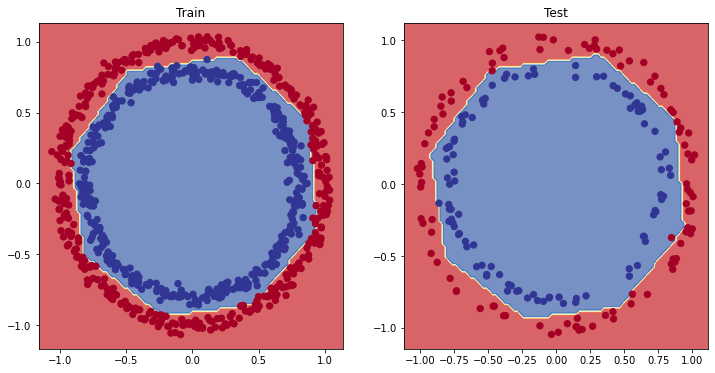

In [53]:
# Plot the decision boundary for training and test set

plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)

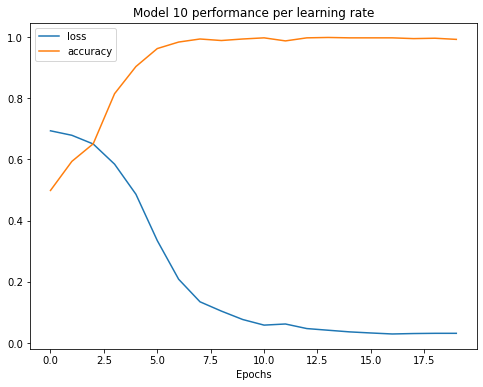

In [54]:
# Model 10 performance
history_df10 = pd.DataFrame(history_10.history)

history_df10.plot(figsize=(8,6))

plt.xlabel("Epochs")
plt.title("Model 10 performance per learning rate");

## Some common classification evaluation methods

keys: tp= True Positive, tn= True Negative, fp= False Positive, fn= False Negative

### 1. Accuracy

* Formula: (tp+tn) / (tp+tn+fp+fn)
* Code: `tf.keras.metrics.Accuracy()` or `sklearn.metrics.accuracy_score()`
* When to use: Default metric for classification problems. Not the best for imbalanced classes.

### 2. Precision

* Formula: (tp) / (tp+fp)
* Code: `tf.keras.metrics.Precision()` or `sklearn.metrics.precision_score()`
* When to use: Higher precision leads to less false psitives.

### 3. Recall

* Formula: (tp) / (tp+fn)
* Code: `tf.keras.metrics.Recall()` or `sklearn.metrics.recall_score()`
* When to use: Higher recall leads to less false negatives.

📖:  Read [https://medium.com/analytics-vidhya/precision-recall-tradeoff-79e892d43134](https://medium.com/analytics-vidhya/precision-recall-tradeoff-79e892d43134) to understand the precision-recall tradeoff

### 4. F1-score

* Formula: 2 * (precision * recall) / (precision + recall)
* Code: `sklearn.metrics.f1_score()`
* When to use: Combination of precision and recall, usually a good overall metric for a classification model.

### 5. Confusion matrix

* Formula: none
* Code: custom function or `sklearn.metrics.confusion_matrix()`
* When to use: When comparing predictions to truth labels to where model gets confused. Can be hard to use with large number of classes.

### 6. Classification report

* Formula: -
* Code: `sklearn.metrics.classification_report()`
* When to use: -

## Finding a model accuracy

In [55]:
# Check accuracy of our model
loss_10, accuracy_10 = model_10.evaluate(X_test, y_test)
loss_10, accuracy_10

7/7 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9900


(0.04131109640002251, 0.9900000095367432)

## Creating confusion matrix

In [56]:
# Making predictions
y_preds_10 = model_10.predict(X_test)
y_preds_10

7/7 [==============================] - 0s 2ms/step


array([[9.99526381e-01],
       [9.99720156e-01],
       [9.99097288e-01],
       [9.98994231e-01],
       [6.12191334e-02],
       [1.62393134e-02],
       [9.52805638e-01],
       [1.47818227e-03],
       [9.99178529e-01],
       [3.74861300e-01],
       [9.99603152e-01],
       [6.07161582e-01],
       [9.78395343e-01],
       [9.81272936e-01],
       [9.98934388e-01],
       [9.99068081e-01],
       [9.99038398e-01],
       [9.97180164e-01],
       [1.29073560e-02],
       [9.99360919e-01],
       [1.41200302e-02],
       [9.93811369e-01],
       [9.98994350e-01],
       [9.97539937e-01],
       [6.32787298e-04],
       [9.97649968e-01],
       [9.95727718e-01],
       [9.32378287e-04],
       [1.10419258e-03],
       [9.98964906e-01],
       [2.24833610e-03],
       [9.83553529e-01],
       [9.98962820e-01],
       [5.97007223e-04],
       [8.95181224e-02],
       [9.91259158e-01],
       [8.68360341e-01],
       [9.98696804e-01],
       [9.98687208e-01],
       [9.98900771e-01],


In [57]:
# TODO: uncomment code in this cell so that its error appears

# Create confusion matrix
# confusion_matrix(y_test, y_preds_10)

Looking at the error, `can't handle a mix of binary and continuous targets`, it seems like one the arguments passed to the confusion_matrix() contains binary values (surely the truth value, in the form 0 and 1), while the others arguments is in the form of continuous values.            
Let's check the content of the two arguments.

In [58]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [59]:
y_preds_10[:10]

array([[0.9995264 ],
       [0.99972016],
       [0.9990973 ],
       [0.99899423],
       [0.06121913],
       [0.01623931],
       [0.95280564],
       [0.00147818],
       [0.9991785 ],
       [0.3748613 ]], dtype=float32)

We can confirm that `y_test` contains discrete values while `y_preds_10` contains continuous values.   
The predictions should contains the same type of data as the labels.

`y_preds_10` has come out in **prediction probability** form, the standard output from the sigmoid (or softmax) activation functions. We need to convert them: the closer the value is to one, the more the model thinks that it's a 1 label; and the closer the value is to zero, the more the model thinks that it's a 0 label.
So, anything higher than 0.5 will go to label 1, and other values will go to label 0.

In [60]:
# Convert prediction probability to binary format
tf.round(y_preds_10)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [61]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds_10))

array([[99,  2],
       [ 0, 99]], dtype=int64)

## Plot confusion matrix

Step: normalize the confusion matrix

In [62]:
cm = confusion_matrix(y_test, tf.round(y_preds_10))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
cm_norm

array([[0.98019802, 0.01980198],
       [0.        , 1.        ]])

In [63]:
# Code testing
cm.sum(axis=1)

array([101,  99], dtype=int64)

In [64]:
# Code testing
cm.sum(axis=1)[:,np.newaxis]

array([[101],
       [ 99]], dtype=int64)

Step: retrieve the number of classes

In [65]:
cm = confusion_matrix(y_test, tf.round(y_preds_10))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix

n_classes= cm.shape[0]

n_classes

2

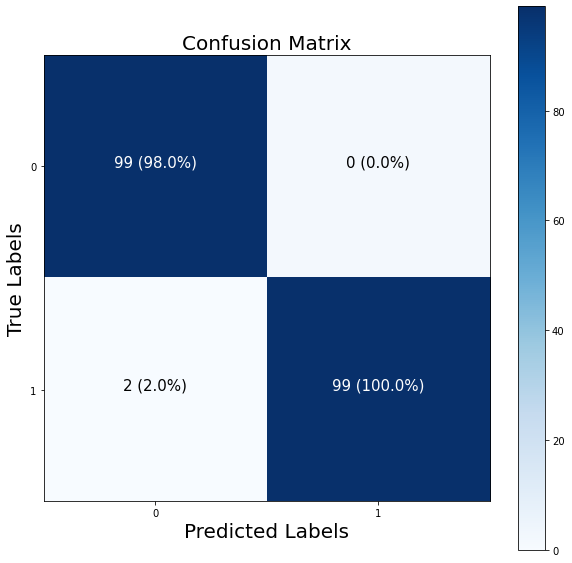

In [66]:
cm = confusion_matrix(y_test, tf.round(y_preds_10))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix

n_classes= cm.shape[0] # Retrieve the number of classes

fig, ax = plt.subplots(figsize=(10,10))

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) 
fig.colorbar(cax)

# Create classes
classes=False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])
    
# Label the axes
ax.set(title="Confusion Matrix", xlabel="Predicted Labels", ylabel="True Labels", 
       xticks=np.arange(n_classes), xticklabels=labels,
       yticks=np.arange(n_classes), yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)


# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for r, c in itertools.product( range(cm.shape[0]), range(cm.shape[1]) ):
    plt.text(r,c, 
             f"{cm[r,c]} ({cm_norm[r,c]*100:.1f}%)", # set text to print
            horizontalalignment="center", # set text alignment
            color="white" if cm[r,c]>threshold else "black", # set text color
             size=15
            )

📖 Here is another way to plot a confusion matrix: [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)

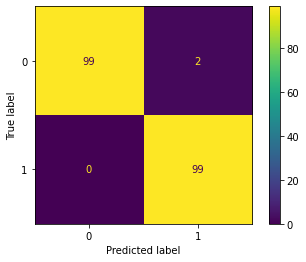

In [67]:
cm2 = confusion_matrix(y_test, tf.round(y_preds_10), labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=[0,1])
disp.plot()
plt.show()

# Multi-class classification

When we have more than two classes as an option, it's know as multi-class classfication. For example, we want to predict whether a piece of clothing is a shoe, a shirt, or a jacket.    
With a few tweaks, everything that was seen for binary classification can also be applied to multi-class classifications.

## Getting the dataset

**Dataset used for this learning**: [Tensorflow MNIST dataset](https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=fr) 

**Dataset description**: *Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.*

Each training and test example is assigned to one of the following labels:
* 0	: T-shirt/top
* 1	: Trouser
* 2	: Pullover
* 3	: Dress
* 4	: Coat
* 5	: Sandal
* 6	: Shirt
* 7	: Sneaker
* 8	: Bag
* 9	: Ankle boot

In [68]:
# Retrieve the training and test sets from the mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [69]:
# First training sample
print(f"First Training sample: \n {train_data[0]}")

First Training sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0  

In [70]:
# First training label
print(f"First Training label: \n {train_labels[0]}")

First Training label: 
 9


In [71]:
train_data.shape

(60000, 28, 28)

In [72]:
test_data.shape

(10000, 28, 28)

In [73]:
train_labels.shape

(60000,)

In [74]:
test_labels.shape

(10000,)

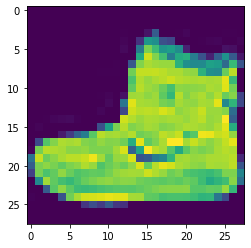

In [75]:
# Plot the first sample
plt.imshow(train_data[0]);

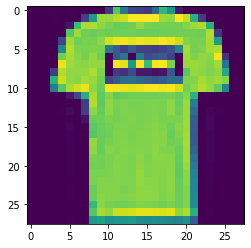

In [76]:
# Plot the second sample
plt.imshow(train_data[1]);

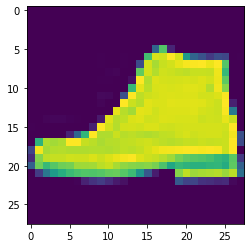

In [77]:
# Plot another sample
plt.imshow(train_data[42]);

In [78]:
# Create an index for the labels to make them human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

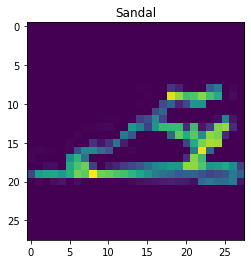

In [79]:
# Plot another sample with its label
choice_idx = 300
plt.imshow(train_data[choice_idx])
plt.title(class_names[train_labels[choice_idx]]);

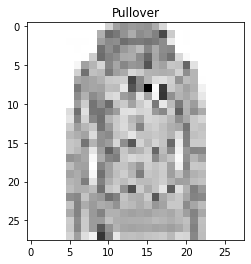

In [80]:
# Plot another sample in grayscale with its label
choice_idx = 4500
plt.imshow(train_data[choice_idx], cmap=plt.cm.binary)
plt.title(class_names[train_labels[choice_idx]]);

In [81]:
# Plot multiple random samples
def plot_random_samples():
    """ Plot random samples in the training dataset """
    plt.figure(figsize=(7,7))
    for i in range(4):
        ax = plt.subplot(2,2, i+1)
        rand_idx = random.choice( range( train_data.shape[0] ) )
        plt.imshow( train_data[rand_idx], cmap=plt.cm.binary)
        plt.title( class_names[ train_labels[rand_idx] ] )
        plt.axis(False)

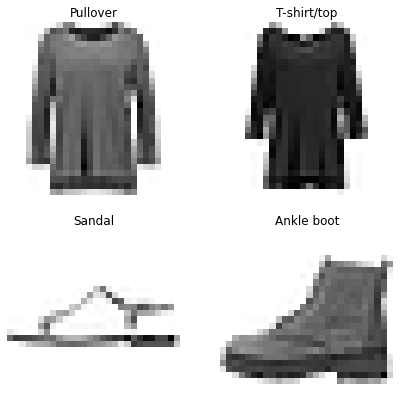

In [82]:
plot_random_samples()

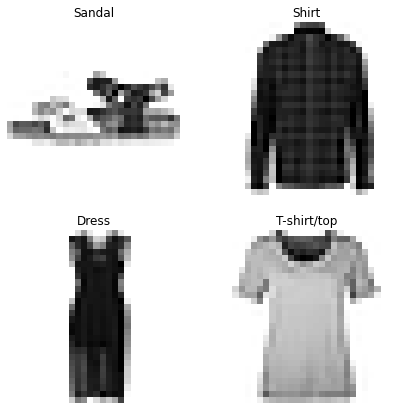

In [83]:
plot_random_samples()

## Building a multi-class classification model

For the multi-class classification model, we can use a similar architecture to the binary classifiers; however, we are going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy() if the labels are one-hot encoded, tf.keras.losses.SparseCategoricalCrossentropy() otherwise
* Output layer activation function = Softmax

In [84]:
# Checking the input shape
train_data[0].shape

(28, 28)

Before proceeding, it is important to know that the neural networks like to have its input in one long vector. There is a layer which can take the input variables of a given shape and transform them in one long vector: `tf.keras.layers.Flatten()`

In [85]:
# Observing the tf.keras.layers.Flatten() in action
flatten_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28))
])
flatten_model.output_shape

(None, 784)

In [86]:
# Observing the tf.keras.layers.Flatten() in action
flatten_model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(1,10,64))
])
flatten_model2.output_shape

(None, 640)

In [87]:
# TODO: uncomment the code here so that its error appear

# # Set random seed
# tf.random.set_seed(42)

# # 1. Create the model
# model_11 = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28,28)), # Flatten the inputs of 28x28 shape to one long vector, and pass it to the next layer 
#     tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
#     tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
#     tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax),
# ])

# # 2. Compile the model
# model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(), # CategoricalCrossentropy() is used because we are doing multiclass classification
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=["accuracy"])

# # 3. Fit the model
# history_11 = model_11.fit(train_data,train_labels,
#                           validation_data= (test_data, test_labels), # Define validation set
#                           epochs=50, verbose=1,)

Epoch 1/50


ValueError: in user code:

    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 1) and (32, 10) are incompatible


The above error is related to the fact that we use `CategoricalCrossentropy()` as a loss function; according to the documentation, that loss function should be used when the labels are provided in a one_hot representation. If labels are provided as integer, the loss function that should be used is `SparseCategoricalCrossentropy()`.  

Reference: [https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy#used-in-the-notebooks](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy#used-in-the-notebooks)

In [88]:
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [89]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_11 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Flatten the inputs of 28x28 shape to one long vector, and pass it to the next layer 
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax),
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # SparseCategoricalCrossentropy() is used because we are doing multiclass classification on data which labels are not one-hot encoded
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_11 = model_11.fit( train_data ,train_labels,
                          validation_data= (test_data, test_labels), 
                          epochs=10, verbose=1,)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.4411 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3030 - accuracy: 0.0989 - val_loss: 2.3024 - val_accuracy: 0.1001
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.0723 - accuracy: 0.1642 - val_loss: 1.7758 - val_accuracy: 0.2429
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7165 - accuracy: 0.2681 - val_loss: 1.6826 - val_accuracy: 0.2904
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6487 - accuracy: 0.2918 - val_loss: 1.6300 - val_accuracy: 0.2980
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6010 - accuracy: 0.3134 - val_loss: 1.5755 - val_accuracy: 0.3344
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5402 - accuracy: 0.3514 - val_loss: 1.5139 - val_accuracy:

Now as experiment, we are going to onehot encode the labels so that we can use the `CategoricalCrossentropy()` loss function

In [90]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [91]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_11_b = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), 
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax),
])

# 2. Compile the model
model_11_b.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_11_b = model_11_b.fit( train_data ,
                          tf.one_hot(train_labels, depth=10),
                          validation_data= (test_data, tf.one_hot(test_labels, depth=10) ), 
                          epochs=10, verbose=1,)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.5628 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

If you get shape errors with the model, there are 03 main things to look at:
* input shape
* output shape
* loss function

In [92]:
# Model 11 summary
model_11.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


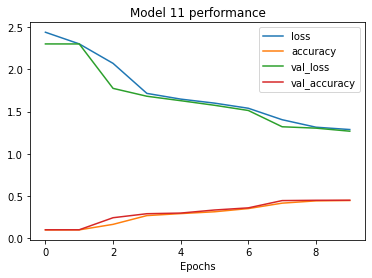

In [97]:
# Model 11 performance plot
history_df11 = pd.DataFrame(history_11.history)
history_df11.plot()

plt.xlabel("Epochs")
plt.title("Model 11 performance");

## Improving the model performance with rescaling
Neural networks prefer data to be rescaled between 0 and 1.   
We can get the training and test data between 0 and 1 by dividing them by the maximum.

In [93]:
# Check the scale of training data
train_data.min(), train_data.max()

(0, 255)

In [94]:
train_data_max = train_data.max()
train_data_norm = train_data / train_data_max
test_data_norm = test_data / train_data_max

In [95]:
# Check the scale of the rescaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

We will train on the same model as before, except that now the data will be rescaled.

In [98]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_12 = model_12.fit(train_data_norm, train_labels,
                         validation_data=(test_data_norm, test_labels),
                         epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0254 - accuracy: 0.6125 - val_loss: 0.7148 - val_accuracy: 0.7330
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6449 - accuracy: 0.7711 - val_loss: 0.6335 - val_accuracy: 0.7788
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5848 - accuracy: 0.7978 - val_loss: 0.5892 - val_accuracy: 0.7991
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5562 - accuracy: 0.8086 - val_loss: 0.5873 - val_accuracy: 0.8013
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5422 - accuracy: 0.8152 - val_loss: 0.5836 - val_accuracy: 0.7984
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5304 - accuracy: 0.8184 - val_loss: 0.5694 - val_accuracy: 0.8053
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5243 - accuracy: 0.8209 - val_loss: 0.5586 - val_accuracy:

model_12, trained on the rescaled data, is cleary performing much better than model_11 which was trained on non-rescaled data.

In [99]:
model_12.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5534 - accuracy: 0.8082


[0.5534261465072632, 0.8082000017166138]

In [100]:
model_11.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.2683 - accuracy: 0.4505


[1.268264889717102, 0.4505000114440918]

<Figure size 864x432 with 0 Axes>

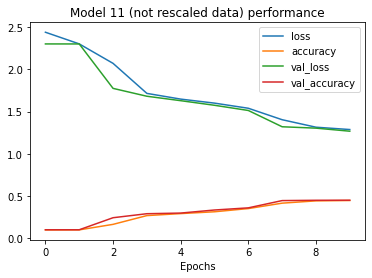

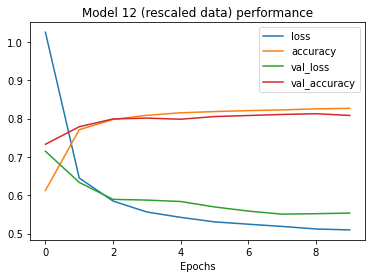

In [109]:
plt.figure(figsize=[12,6]);

# plt.subplot(1,2,1)
# Model 11 performance plot
history_df11 = pd.DataFrame(history_11.history)
history_df11.plot()

plt.xlabel("Epochs")
plt.title("Model 11 (not rescaled data) performance");

# plt.subplot(1,2,2)
# Model 12 performance plot
history_df12 = pd.DataFrame(history_12.history)
history_df12.plot()

plt.xlabel("Epochs")
plt.title("Model 12 (rescaled data) performance");

🔑 **Note**: The same model with even slightly different data can produce dramaticcaly different results. So when comparing models, it's important to make sure we are comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

When updating two model, change one *small* thing on the first, then compare its result to the second one. If you change 10 bigs things to the first models, you will no more know what is producing the difference between the two model.

## Finding the ideal rate for a classification model
The ideal learning rate is the one where the loss decreases the most.

In [114]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
    
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20) )

# Fit the model
history_13 = model_13.fit(train_data_norm, train_labels,
                          validation_data=(test_data_norm, test_labels),
                         epochs=40, verbose=1)

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5324 - accuracy: 0.4282 - val_loss: 1.1929 - val_accuracy: 0.5331
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0913 - accuracy: 0.5386 - val_loss: 1.0286 - val_accuracy: 0.5666
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9747 - accuracy: 0.5882 - val_loss: 0.9467 - val_accuracy: 0.6403
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8949 - accuracy: 0.6474 - val_loss: 0.8851 - val_accuracy: 0.6543
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8532 - accuracy: 0.6535 - val_loss: 0.8618 - val_accuracy: 0.6617
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8272 - accuracy: 0.6619 - val_loss: 0.8367 - val_accuracy: 0.6708
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8132 - accuracy: 0.6665 - val_loss: 0.8290 - val_accuracy:

Now we will plot the learning rate decay curve in order to find the ideal learning rate.

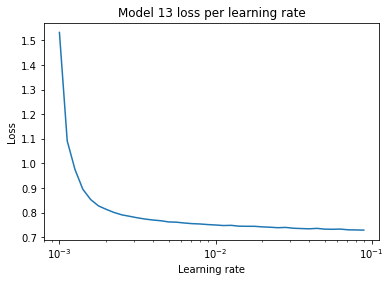

In [115]:
n_epochs=40 # number of epochs we trained

# Replicating the formula that was passed to the learning rate scheduler
lrs = 1e-3 * 10**( tf.range(n_epochs)/20 ) # This provide the learning for each epoch

plt.semilogx(lrs, history_13.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Model 13 loss per learning rate");

The ideal learning rate is `10**-3`, which happen to be the default learning rate for the Adam() optimizer. But for the sake of training, let's refit the model with the ideal learning rate.

In [119]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=.001),
                metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm, train_labels,
                         validation_data=(test_data_norm, test_labels),
                         epochs=20, verbose=1)

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5494 - accuracy: 0.4088 - val_loss: 1.1392 - val_accuracy: 0.5409
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0487 - accuracy: 0.5800 - val_loss: 0.9843 - val_accuracy: 0.6065
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9187 - accuracy: 0.6235 - val_loss: 0.8814 - val_accuracy: 0.6372
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8437 - accuracy: 0.6478 - val_loss: 0.8333 - val_accuracy: 0.6559
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7657 - accuracy: 0.7161 - val_loss: 0.7390 - val_accuracy: 0.7343
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6952 - accuracy: 0.7495 - val_loss: 0.7069 - val_accuracy: 0.7476
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6679 - accuracy: 0.7536 - val_loss: 0.6843 - val_accuracy:

## Evaluating the multi-class classification model 

To evaluate the multi-class classficiation model, we could:
* Evaluate its performance using other classification metrics (such us confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer, or changing its architecture, or tuning the data)
* Save and export it for use in an application

We will go through the top 02.

### Looking at the training performance

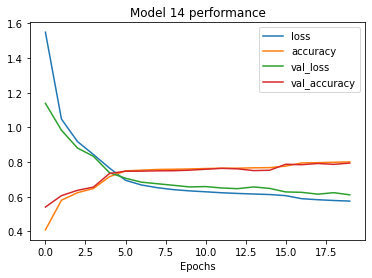

In [135]:
# Model 14 performance plot
history_df14 = pd.DataFrame(history_14.history)
history_df14.plot()

plt.xlabel("Epochs")
plt.title("Model 14 performance");

### Looking at the performance on specific labels

In [122]:
# Create a confusion matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):


    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix

    n_classes= cm.shape[0] # Retrieve the number of classes

    fig, ax = plt.subplots(figsize=figsize)

    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues) 
    fig.colorbar(cax)

    # Set labels to be classes if they exist, otherwise set labels to be a list of numbers
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix", xlabel="Predicted Labels", ylabel="True Labels", 
           xticks=np.arange(n_classes), xticklabels=labels,
           yticks=np.arange(n_classes), yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.xaxis.label.set_size(text_size+5)
    ax.yaxis.label.set_size(text_size+5)
    ax.title.set_size(text_size+5)


    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for r, c in itertools.product( range(cm.shape[0]), range(cm.shape[1]) ):
        plt.text(r,c, 
                 f"{cm[r,c]} ({cm_norm[r,c]*100:.1f}%)", # set text to print
                horizontalalignment="center", # set text alignment
                color="white" if cm[r,c]>threshold else "black", # set text color
                 size=text_size
                )

In [124]:
y_probs_14 = model_14.predict(test_data_norm) # prob is short for "prediction probabilities"

y_probs_14[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.1476498e-09, 1.4288751e-14, 1.6245123e-15, 2.3509449e-08,
        8.2220447e-10, 1.5600428e-01, 2.5359665e-09, 3.1720650e-01,
        3.2190536e-04, 5.2646726e-01],
       [1.1093011e-03, 2.9289664e-09, 7.6526010e-01, 3.6524376e-03,
        1.4367543e-01, 3.6534598e-10, 8.6232111e-02, 4.0114878e-12,
        7.0713526e-05, 9.1372400e-20],
       [6.0888105e-08, 9.9091971e-01, 9.0134755e-10, 9.0589747e-03,
        4.1597204e-07, 2.0848360e-05, 3.3200380e-09, 8.8420092e-13,
        3.4314551e-10, 6.5644186e-14],
       [4.3961252e-09, 9.9523348e-01, 6.3803317e-11, 4.7600279e-03,
        9.6577892e-08, 6.3792650e-06, 2.2592515e-10, 3.7008757e-14,
        2.9326062e-11, 2.2530318e-15],
       [2.2422196e-01, 4.2849148e-05, 3.2127839e-01, 3.4156770e-02,
        2.6343632e-02, 1.7150523e-05, 3.9166847e-01, 1.7803619e-06,
        2.2689593e-03, 5.1766408e-10]], dtype=float32)

🔑 **Note**: Remember to make predictions on the same kind of data the model was trained on (e.g. if the model was trained on normalized data, you'll want to make predictions on normalized data)

In [126]:
# Recalling the labels
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [125]:
# Looking at the 1st prediction
y_probs_14[0], tf.argmax(y_probs_14[0])

(array([2.1476498e-09, 1.4288751e-14, 1.6245123e-15, 2.3509449e-08,
        8.2220447e-10, 1.5600428e-01, 2.5359665e-09, 3.1720650e-01,
        3.2190536e-04, 5.2646726e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>)

In [131]:
# Looking at which label the model think the 1st sample is
class_names[tf.argmax(y_probs_14[0]).numpy()]

'Ankle boot'

In [133]:
# Looking at the true nature of the 1st sample
class_names[test_labels[0]]

'Ankle boot'

Now let's turn our predictions probabilities into predictions.

In [134]:
# Convert all the prediction probabilities into integers
y_preds_14 = y_probs_14.argmax(axis=1) # Return the indices of the maximum values along the axis 1

# View the first 10 predictions
y_preds_14[:10]

array([9, 2, 1, 1, 6, 1, 6, 6, 5, 7], dtype=int64)

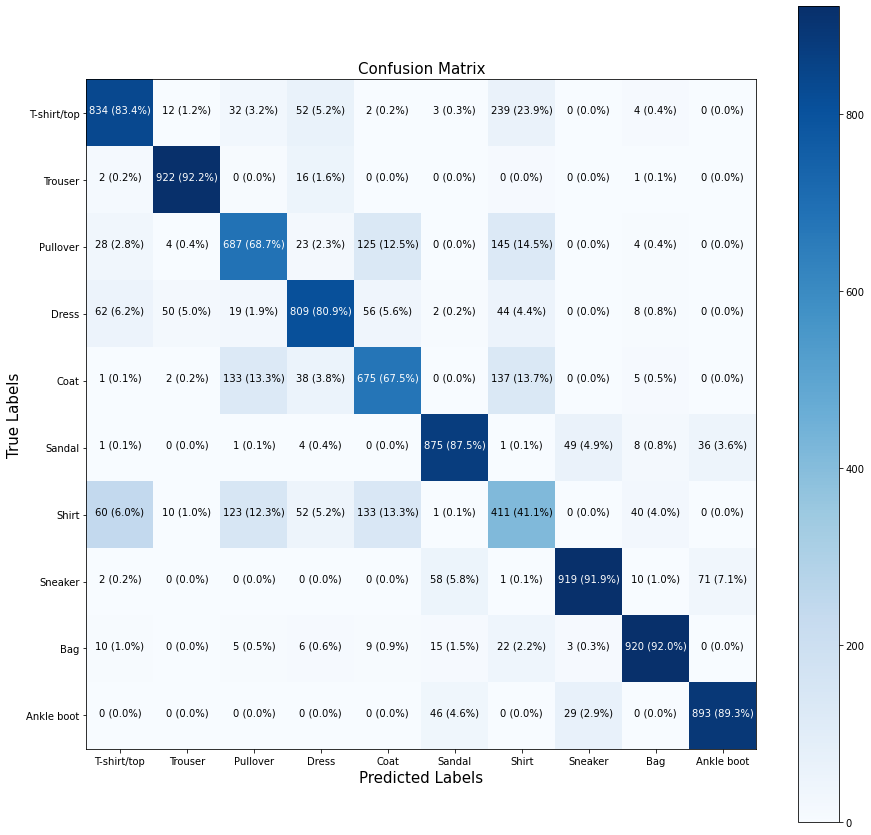

In [137]:
# Plotting confusion matrix
make_confusion_matrix(y_true=test_labels, y_pred=y_preds_14, classes= class_names, figsize=(15,15), text_size=10)

The confusion matrix tell us where the model is performing well and where it's getting confused. This allow us to know how we could improve the model.           

TODO: Interpret the confusion matrix above.

🔑 **Note**: Often, when working with images and others forms of visual data, it's a good idea to visualize as much as possible to develp a further understanding of the data and the inputs and outputs of the model.

In [146]:
def plot_random_image(model, images, true_labels, classes):
    """
        Picks a random image, plots it and labels it with a prediction and truth label
    """
    
    #Set up a random integer
    i = random.randint(0, len(images))
    
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[ pred_probs.argmax() ]
    true_label = classes[ true_labels[i] ]
    
    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    #Change the color of the title depending on if the prediction is right or not
    color = "green" if pred_label == true_label else "red"
    
    # Add xlabel information (prediction/true label)
    plt.xlabel(f"Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% (True: {true_label})", color=color)
#    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs),true_label), color=color)

#     plt.axis(False)

1/1 [==============================] - 0s 25ms/step


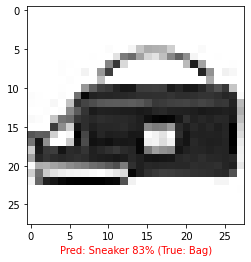

In [151]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, images=test_data_norm, true_labels=test_labels, classes=class_names)

1/1 [==============================] - 0s 24ms/step


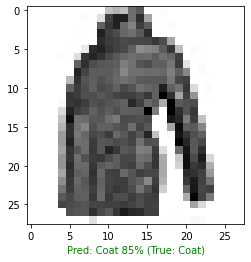

In [152]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, images=test_data_norm, true_labels=test_labels, classes=class_names)

1/1 [==============================] - 0s 29ms/step


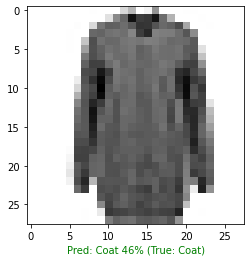

In [153]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, images=test_data_norm, true_labels=test_labels, classes=class_names)

1/1 [==============================] - 0s 31ms/step


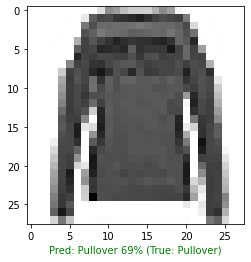

In [154]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, images=test_data_norm, true_labels=test_labels, classes=class_names)

## Patterns our model is learning

In [155]:
# Find the layers of our most recent model
model_14.layers

In [156]:
# Extract a particular layer
model_14.layers[1]

In [157]:
# Get the patterns (weights and biases) of a layer
weights, biases = model_14.layers[1].get_weights()

In [158]:
weights

array([[ 0.48018616,  0.03704987,  0.01738766, -0.5520023 ],
       [-0.06279429,  0.04237702, -0.43194953, -0.54521286],
       [-0.45134562,  0.11951065, -0.9136107 ,  0.0834249 ],
       ...,
       [ 0.32758942, -0.02086607, -0.16615812, -1.1466718 ],
       [ 0.04956432,  0.04606504,  0.356471  , -1.082679  ],
       [ 0.17543466,  0.02602028,  0.08158544, -0.7405611 ]],
      dtype=float32)

In [159]:
biases

array([ 2.309029  , -0.02233814,  1.6103117 ,  1.2357118 ], dtype=float32)

In [160]:
weights.shape

(784, 4)